# make data

In [2]:
import requests
import pandas as pd
from typing import List, Dict

from utils import *

In [4]:
raw_data = pd.read_csv("raw_data.csv")
raw_data.head()

,name,publisher,authors,author_1,author_2,author_3,author_4,author_5,author_6,author_7,author_8,author_9,author_10,author_11,author_12,author_13,author_14
0,情報量統計学 (情報科学講座 A・5・4) (情報科学講座 (A・5・4)),共立出版,坂元慶行，石黒真木夫，北川源四郎,坂元慶行,石黒真木夫,北川源四郎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,多変量解析法入門,サイエンス社,永田靖，棟近雅彦,永田靖,棟近雅彦,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,多変量解析入門――線形から非線形へ,岩波書店,小西貞則,小西貞則,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,カーネル多変量解析―非線形データ解析の新しい展開,岩波書店,赤穂昭太郎,赤穂昭太郎,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,初等多変量解析,朝倉書店,武藤眞介,武藤眞介,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_list = []
error_list = []
df_search_params = raw_data[["name", "authors", "publisher"]]

for _ in range(10):
    for title, author, publisher in df_search_params.itertuples(index=False, name=None):
        try:
            tmp = search_books(title=title, author=author, publisher=publisher, max_results=1)
            use_title, use_author, use_publisher = 1, 1, 1
            if tmp.empty:
                tmp = search_books(title=title, author=author, publisher="", max_results=1)
                use_title, use_author, use_publisher = 1, 1, 0
            if tmp.empty:
                tmp = search_books(title=title, author="", publisher=publisher, max_results=1)
                use_title, use_author, use_publisher = 1, 0, 1
            if tmp.empty:
                tmp = search_books(title="", author=author, publisher=publisher, max_results=1)
                use_title, use_author, use_publisher = 0, 1, 1
            if tmp.empty:
                error_list.append([title, author, publisher, use_title, use_author, use_publisher])
                use_title, use_author, use_publisher = 0, 0, 0
            else:
                tmp['search_title'] = title
                tmp['use_title'] = use_title
                tmp['use_author'] = use_author
                tmp['use_publisher'] = use_publisher
                df_list.append(tmp)
        except Exception as e:
            error_list.append([title, author, publisher, use_title, use_author, use_publisher])
            print(f"Error occurred for {title}, {author}, {publisher}: {e}")

df_result = pd.concat(df_list).drop_duplicates(subset=['search_title']).reset_index(drop=True)

df_search_params_ = df_search_params.copy()
df_search_params_.rename({"name":"title"}, axis = 1, inplace=True)
df_search_params_.columns = ['search_' + col for col in df_search_params_.columns]
df_output = pd.merge(df_search_params_, df_result, how = "outer", on = "search_title")
df_output['errors'] = df_output['use_title'].apply(lambda x: 1 if pd.isna(x) else 0)

from datetime import datetime
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
df_output.to_csv(f'dataset_{current_time}.csv', index=False)
df_output

,search_title,search_authors,search_publisher,title,authors,publisher,published_date,description,page_count,categories,language,use_title,use_author,use_publisher,errors
0,A/Bテスト実践ガイド 真のデータドリブンへ至る信用できる実験とは,Ron Kohavi，Diane Tang，Ya Xu，大杉直也,ドワンゴ,A/Bテスト実践ガイド,"Ron Kohavi, Diane Tang, Ya Xu",,2021-03,経営層からデータサイエンティスト、エンジニアまで全関係者必読の教科書!...,289,,ja,1.0,1.0,0.0,0
1,AIエンジニアのための機械学習システムデザインパターン,澁井雄介,翔泳社,AIエンジニアのための機械学習システムデザインパターン,澁井 雄介,翔泳社,2021-05-17,機械学習システム構築に必要な デザインパターンがここにある！ 【本書の背景】 Pythonを...,442,,ja,1.0,1.0,1.0,0
2,AI・データ分析プロジェクトのすべて[ビジネス力×技術力=価値創出],大城信晃，マスクド・アナライズ，伊藤徹郎，小西哲平，西原成輝,技術評論社,AI・データ分析プロジェクトのすべて,"大城信晃, マスクド・アナライズ, 伊藤徹郎, 小西哲平, 西原成輝, 油井志郎",,2020-12,現場でしか得られないビジネス知識/暗黙知を解説。課題設定→案件獲得→外注見積→契約→分析手法...,320,,ja,1.0,1.0,1.0,0
3,AI白書2019,独立行政法人情報処理推進機構AI白書編集委員会,KADOKAWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,AWS運用入門 押さえておきたいAWSの基本と運用ノウハウ,佐竹陽一，山﨑翔平，小倉大，峯侑資,SBクリエイティブ,AWS運用入門,"佐竹陽一, 山﨑翔平, 小倉大, 峯侑資",SBクリエイティブ,2023-03-31,現場で役立つ！ AWSトップエンジニアが実践しているシステム運用の手法とコツ ※この電子書籍...,507,Computers,ja,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,音声認識,篠田浩一,講談社,音声認識,篠田浩一,,2017-12,基礎理論はコンパクトにまとめ、「耐雑音」「話者認識」「深層学習」についてたっぷり解説。音声認...,165,,ja,1.0,1.0,1.0,0
386,高次元の統計学,青嶋誠，矢田和善,共立出版,高次元の統計学,"青嶋誠, 矢田和善",,2019-04-30,,110,,ja,1.0,1.0,1.0,0
387,ＬａＴｅＸ超入門 ゼロからはじめる理系の文書作成術,水谷正大,講談社,LaTeX超入門,水谷正大,,2020-07,理系のレポート作成や論文執筆の定番「LaTeX」の使い方が一冊でわかる!これだけ読めばレポー...,270,,ja,1.0,1.0,0.0,0
388,ＬａＴｅＸ超入門 ゼロからはじめる理系の文書作成術,水谷正大,講談社,LaTeX超入門,水谷正大,,2020-07,理系のレポート作成や論文執筆の定番「LaTeX」の使い方が一冊でわかる!これだけ読めばレポー...,270,,ja,1.0,1.0,0.0,0


In [33]:
df_search_params = raw_data[["name", "authors", "publisher"]]
df_search_params_ = df_search_params.copy()
df_search_params_.rename({"name":"title"}, axis = 1, inplace=True)
df_search_params_.columns = ['search_' + col for col in df_search_params_.columns]
df_output = pd.merge(df_search_params_, df_result, how = "outer", on = "search_title")
df_output['errors'] = df_output['use_title'].apply(lambda x: 1 if pd.isna(x) else 0)

df_output

,search_title,search_authors,search_publisher_x,title,authors,publisher,published_date,description,page_count,categories,language,search_author,search_publisher_y,use_title,use_author,use_publisher,errors
0,A/Bテスト実践ガイド 真のデータドリブンへ至る信用できる実験とは,Ron Kohavi，Diane Tang，Ya Xu，大杉直也,ドワンゴ,A/Bテスト実践ガイド,"Ron Kohavi, Diane Tang, Ya Xu",,2021-03,経営層からデータサイエンティスト、エンジニアまで全関係者必読の教科書!...,289,,ja,Ron Kohavi，Diane Tang，Ya Xu，大杉直也,ドワンゴ,1.0,1.0,1.0,0
1,AIエンジニアのための機械学習システムデザインパターン,澁井雄介,翔泳社,AIエンジニアのための機械学習システムデザインパターン,澁井 雄介,翔泳社,2021-05-17,機械学習システム構築に必要な デザインパターンがここにある！ 【本書の背景】 Pythonを...,442,,ja,澁井雄介,翔泳社,1.0,1.0,1.0,0
2,AI・データ分析プロジェクトのすべて[ビジネス力×技術力=価値創出],大城信晃，マスクド・アナライズ，伊藤徹郎，小西哲平，西原成輝,技術評論社,AI・データ分析プロジェクトのすべて,"大城信晃, マスクド・アナライズ, 伊藤徹郎, 小西哲平, 西原成輝, 油井志郎",,2020-12,現場でしか得られないビジネス知識/暗黙知を解説。課題設定→案件獲得→外注見積→契約→分析手法...,320,,ja,大城信晃，マスクド・アナライズ，伊藤徹郎，小西哲平，西原成輝,技術評論社,1.0,1.0,1.0,0
3,AI白書2019,独立行政法人情報処理推進機構AI白書編集委員会,KADOKAWA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,AWS運用入門 押さえておきたいAWSの基本と運用ノウハウ,佐竹陽一，山﨑翔平，小倉大，峯侑資,SBクリエイティブ,AWS運用入門,"佐竹陽一, 山﨑翔平, 小倉大, 峯侑資",SBクリエイティブ,2023-03-31,現場で役立つ！ AWSトップエンジニアが実践しているシステム運用の手法とコツ ※この電子書籍...,507,Computers,ja,佐竹陽一，山﨑翔平，小倉大，峯侑資,SBクリエイティブ,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,音声認識,篠田浩一,講談社,音声認識,篠田浩一,,2017-12,基礎理論はコンパクトにまとめ、「耐雑音」「話者認識」「深層学習」についてたっぷり解説。音声認...,165,,ja,篠田浩一,講談社,1.0,1.0,1.0,0
386,高次元の統計学,青嶋誠，矢田和善,共立出版,高次元の統計学,"青嶋誠, 矢田和善",,2019-04-30,,110,,ja,青嶋誠，矢田和善,共立出版,1.0,1.0,1.0,0
387,ＬａＴｅＸ超入門 ゼロからはじめる理系の文書作成術,水谷正大,講談社,LaTeX超入門,水谷正大,,2020-07,理系のレポート作成や論文執筆の定番「LaTeX」の使い方が一冊でわかる!これだけ読めばレポー...,270,,ja,水谷正大,講談社,1.0,1.0,0.0,0
388,ＬａＴｅＸ超入門 ゼロからはじめる理系の文書作成術,水谷正大,講談社,LaTeX超入門,水谷正大,,2020-07,理系のレポート作成や論文執筆の定番「LaTeX」の使い方が一冊でわかる!これだけ読めばレポー...,270,,ja,水谷正大,講談社,1.0,1.0,0.0,0


In [38]:
df_output.to_csv('dataset_v0.csv', index=False)


# check property of making data

In [34]:
error_count = df_output['errors'].sum()
print(f"Total number of errors: {error_count}")


Total number of errors: 20


Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


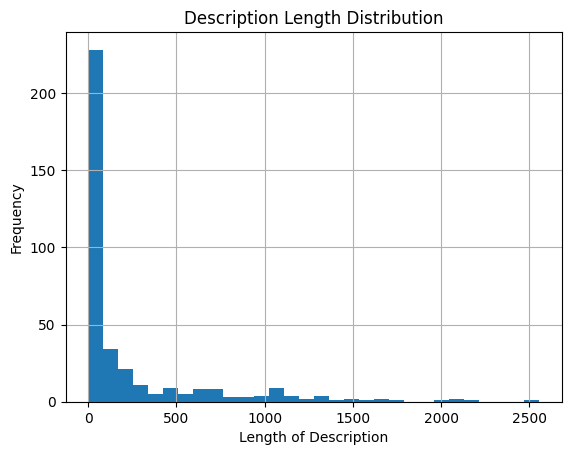

In [36]:
import matplotlib.pyplot as plt

description_lengths = df_output['description'].str.len()
description_lengths.hist(bins=30)
plt.title('Description Length Distribution')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')
plt.show()



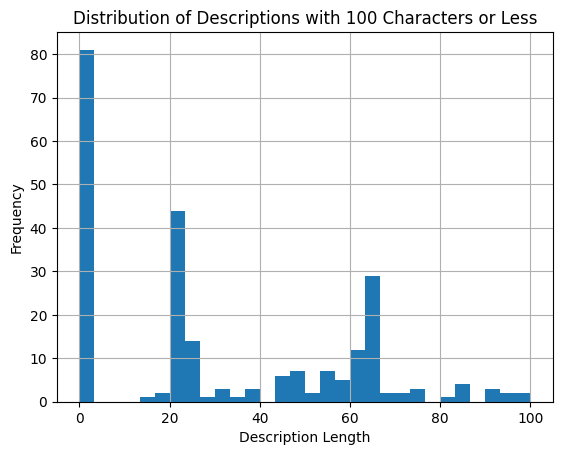

In [37]:
description_lengths[description_lengths <= 100].hist(bins=30)
plt.title('Distribution of Descriptions with 100 Characters or Less')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

